# Project Update 1

## Introduction

This research project focuses on risk governance. More particularly, it identifies and assesses a substantial risk that enterprises are often unaware of: Sales and Use Tax law compliance. Yet, non-compliance with sales and use tax laws and regulations can have dire impact on enterprise functioning and even survival. It is a risk too severe for enterprises to ignore. Our research aims at providing a tool for enterprises to identify, monitor, and mitigate such areas of risk.

# Definition of the Problem

For entrepreneurs and businesses, compliance with government regulations is often an after-thought if a thought at all. They focus on development and production, acquisition and cashflow, marketing and sales, and so forth. That is until the government knocks at their door. In Florida, one government agency that consistently knocks on business doors is the Florida Department of Revenue (DOR), to ensure sales and use tax compliance. With its interagency state and federal data match, its state-of-the-art lead programs, and the sharpness of its auditors, DOR sales and use tax audit is mostly certain to discover non-compliance. In the other side of the diptych, businesses are too often unaware of the variety of third-party data the department have access to and collect through nightly interagency digital data interface. Then, they grow dismayed. The terror starts with the Notice of Intent to Audit Books and Records. Less than a year later, the business receives the Notice of Proposed Assessment which conveys one important message: noncompliance is costly. This research project offers the opportunity to businesses to predict and by that to avoid or mitigate the risk of an audit. Using machine learning, the algorithm predicts the risk of a sales and use tax audit. It puts the power in the hands of businesses. By power, we mean compliance and the avoidance of costly mistakes that cause the business to incur not only additional tax due, but hefty penalties and interests, legal and professional fees, not to mention criminal investigations and proceedings. In extreme cases, an audit means the closure of the business, especially for small businesses.

# Scope of the Project

What we are dealing with is a simple classification problem: Compliance versus noncompliance, audit risk high versus low. Even with its simplicity, our proposed algorithm is mighty. Its value expands way beyond a yes or no prediction. It can prevent businesses from the nightmarish scenario of a sales and use tax audit. It can also become a tool in the hands of sales tax professionals, CPA, auditors, and attorneys involved in the auditing process on the clientele side. It allows them to build audit prevention infrastructures as well as defense strategies for their clients.

# I. Algorithms and Performance Metrics

The Florida Department of Revenue does not publish data relating to its auditing activities. Fortunately, through our research and consulting with industry insiders, we recovered the department lead algorithm. From there, we generate a simulated audit risk dataset. The dataset consists of the result of 100160 sales and use tax audits performed on numerous sectors and industries. Our main data source is the North American Industry Classification System (NAICS). Per the United States Census Bureau, the North American Industry Classification System (NAICS) is the standard used by Federal statistical agencies in classifying business establishments for the purpose of collecting, analyzing, and publishing statistical data related to the U.S. business economy.

To construct the dataset, we use the exempt/taxable ratio industry averages from NAICS. The data comprise multiple features, the most relevant are: • NAICS Code • NAICS Description • Exempt Sales Total • Taxable Sales Tot • Gross Sales Total • Taxable Ratio

The Florida Department of Revenue used industry averages from NAICS to construct its audit lead program. Using the same criteria used by the department to generate the leads, we engineered the Audit Risk dataset with the following features: Taxable Ratio, NAICS Code, Gross Sales Total, NAICS Description, and Gross Income, Tax Paid, Tax Due, and Additional Tax Due. The result of the audit is the class “Audit Risk” which classified the audit risk as High (1) or Low (0).

We will train our model using machine learning algorithms for classification. We will use several performance metrics, including accuracy, F1 score, precision, and recall, to evaluate our model. 

# II. Python Libraries

To execute our project, we use python libraries such as pandas and NumPy for data manipulation and analysis, matplotlib for visualization, and sklearn for machine learning, testing, evaluation. We imported the exhaustive list of the necessary libraries below.

In [17]:
import array
import pandas as pd
import numpy as np
import os
import sys
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from scipy.special import comb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# III. The Dataset

Having all the necessary libraries in place, we can now load the audit risk dataset from memory. We use pandas to transform the csv data file into a data-frame. The data-frame consists of 8 features (columns) and one target variable which is the audit risk column.

In [18]:
# Import the Audit Risk dataset csv file from memory 
audit_risk = pd.read_csv(r'../data/Audit_Risk.csv')

# IV. Data Summary

The next few lines of codes provide an overview of the audit risk data-frame. The head provides a glimpse at the first 5 data rows, whereas the tail shows the last 5 rows. Method calls, including shape, info, and isnull confirm the dimension of dataset, 102920 rows and 9 columns. They reveal no missing or null values, and no anomaly.

In [19]:
# Here is a view of the dataset head and tail.
audit_risk

,Taxable Ratio,Tax Paid,NAICS Code,Gross Sales Total,NAICS Description,Gross Income,Tax Due,Additional Tax Due,Audit Risk
0,0.000000,0.00000,111110,0.0,Soybean Farming,57881367,0.000000e+00,0.0000,0
1,0.000000,0.00000,111110,0.0,Soybean Farming,72944641,0.000000e+00,0.0000,0
2,0.000000,0.00000,111110,0.0,Soybean Farming,64883075,0.000000e+00,0.0000,0
3,0.000000,0.00000,111110,0.0,Soybean Farming,9491569,0.000000e+00,0.0000,0
4,0.000000,0.00000,111110,0.0,Soybean Farming,11691084,0.000000e+00,0.0000,0
...,...,...,...,...,...,...,...,...,...
102915,0.195654,195166.20690,999999,818781523.2,Unclassified Establishments,79167211,9.293629e+05,734196.6831,1
102916,0.195654,466309.96360,999999,818781523.2,Unclassified Establishments,57568594,6.758115e+05,209501.5778,1
102917,0.195654,45332.22453,999999,818781523.2,Unclassified Establishments,12871993,1.511074e+05,105775.1906,1
102918,0.195654,485247.95790,999999,818781523.2,Unclassified Establishments,86115732,1.010933e+06,525685.2878,1


In [20]:
# The dataset comprises 102920 rows with 9 columns: 8 features and 1 target 
# variable, which is the Audit Risk.
audit_risk.shape

(102920, 9)

In [21]:
# The dataset has no null or missing value
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102920 entries, 0 to 102919
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Taxable Ratio       102920 non-null  float64
 1   Tax Paid            102920 non-null  float64
 2   NAICS Code          102920 non-null  int64  
 3   Gross Sales Total   102920 non-null  float64
 4   NAICS Description   102920 non-null  object 
 5   Gross Income        102920 non-null  int64  
 6   Tax Due             102920 non-null  float64
 7   Additional Tax Due  102920 non-null  float64
 8   Audit Risk          102920 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 7.1+ MB


In [22]:
# This confirms that the dataset has no null value
audit_risk.isnull().sum()

Taxable Ratio         0
Tax Paid              0
NAICS Code            0
Gross Sales Total     0
NAICS Description     0
Gross Income          0
Tax Due               0
Additional Tax Due    0
Audit Risk            0
dtype: int64

# V. Descriptive Statistics

The following sections provide summaries, frequency distribution, and visualization of the characteristics of our data-frame, using pandas descriptive statistics function “describe” and matplotlib. Furthermore, we use the Pearson correlation coefficient to measure the linear relationship between variables.

In [23]:
# Use the describe function to compute summary statistics, including mean, median, standard deviation, minimum, 
# maximum, and quartiles
audit_risk.describe()

,Taxable Ratio,Tax Paid,NAICS Code,Gross Sales Total,Gross Income,Tax Due,Additional Tax Due,Audit Risk
count,102920.000000,1.029200e+05,102920.000000,1.029200e+05,1.029200e+05,1.029200e+05,1.029200e+05,102920.000000
mean,0.317142,5.207969e+05,434488.241353,1.341734e+09,5.007296e+07,9.533280e+05,4.325310e+05,0.816071
std,0.304342,8.105106e+05,170710.502280,9.314300e+09,2.886641e+07,1.188408e+06,7.247340e+05,0.387428
min,0.000000,0.000000e+00,111110.000000,0.000000e+00,1.041600e+04,0.000000e+00,-5.246596e+05,0.000000
25%,0.052305,2.519757e+04,325992.000000,7.079738e+06,2.508101e+07,8.294337e+04,8.301519e+03,1.000000
50%,0.220483,1.768894e+05,423830.000000,6.502526e+07,5.004543e+07,4.649794e+05,1.239368e+05,1.000000
75%,0.526504,6.557982e+05,532310.000000,4.347654e+08,7.511434e+07,1.377501e+06,5.351391e+05,1.000000
max,1.000000,6.357486e+06,999999.000000,2.830000e+11,9.999893e+07,5.995626e+06,5.882833e+06,1.000000


Text(0, 0.5, 'Frequency')

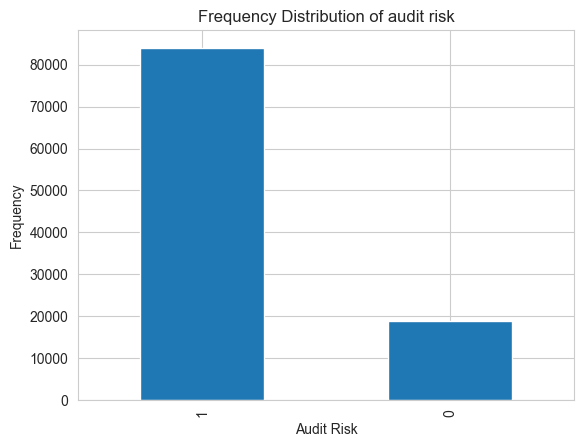

In [24]:
# Display frequency distribution of audit risk, using matplotlib
audit_risk['Audit Risk'].value_counts().plot(kind='bar')
plt.title('Frequency Distribution of audit risk')
plt.xlabel('Audit Risk')
plt.ylabel('Frequency')

In [25]:
# The Pearson correlation coefficient measures the linear relationship between two continuous variables
correlation_matrix = audit_risk.corr(numeric_only=True)
correlation_matrix

,Taxable Ratio,Tax Paid,NAICS Code,Gross Sales Total,Gross Income,Tax Due,Additional Tax Due,Audit Risk
Taxable Ratio,1.000000,0.618270,0.253641,0.005566,0.000976,0.769277,0.570004,0.237302
Tax Paid,0.618270,1.000000,0.158064,0.003356,0.367808,0.801482,0.195902,0.007500
NAICS Code,0.253641,0.158064,1.000000,0.019311,0.002637,0.196267,0.145064,0.057422
Gross Sales Total,0.005566,0.003356,0.019311,1.000000,-0.001145,0.005845,0.005832,0.015450
Gross Income,0.000976,0.367808,0.002637,-0.001145,1.000000,0.460871,0.344389,0.054718
Tax Due,0.769277,0.801482,0.196267,0.005845,0.460871,1.000000,0.743444,0.186589
Additional Tax Due,0.570004,0.195902,0.145064,0.005832,0.344389,0.743444,1.000000,0.297579
Audit Risk,0.237302,0.007500,0.057422,0.015450,0.054718,0.186589,0.297579,1.000000


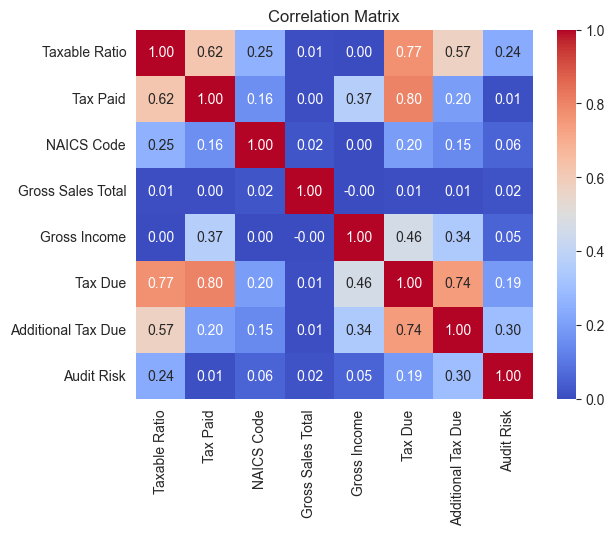

In [26]:
# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# VI. Data Visualizations

The plots below provide visualizations that allows to better conceptualize the data.

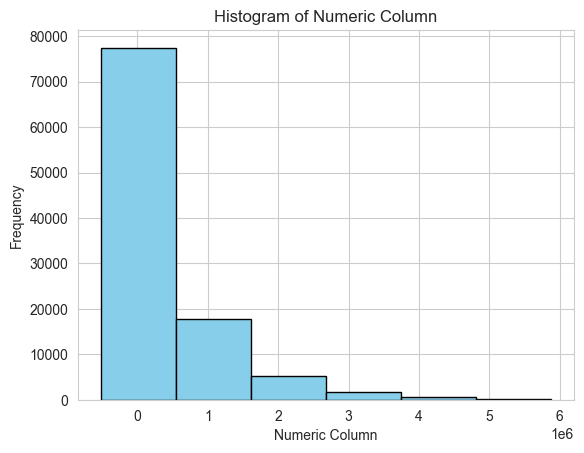

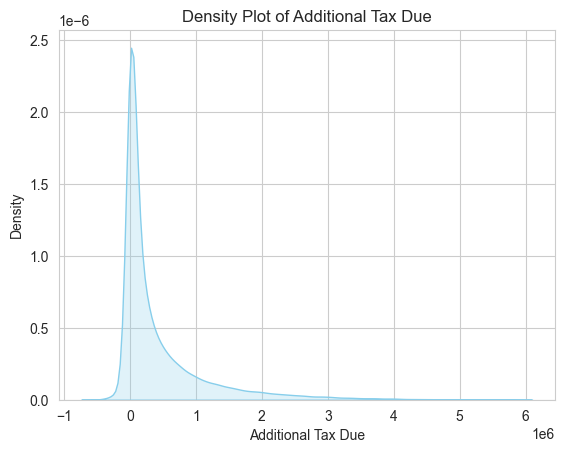

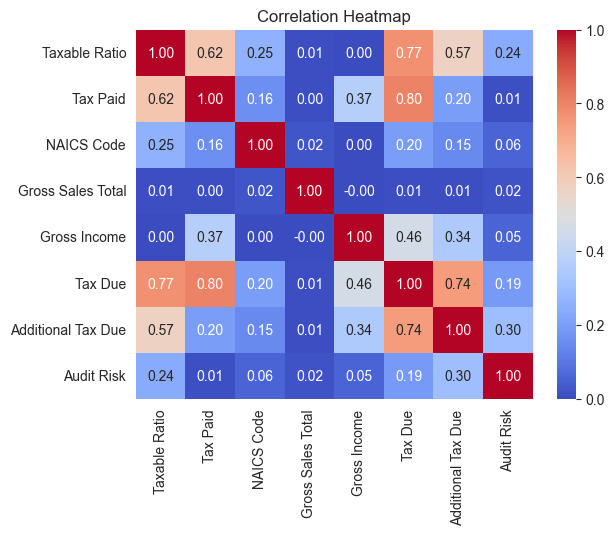

In [27]:
# Histogram
plt.hist(audit_risk['Additional Tax Due'], bins=6, color='skyblue', edgecolor='black')
plt.xlabel('Numeric Column')
plt.ylabel('Frequency')
plt.title('Histogram of Numeric Column')
plt.show()

# Density Plot (Kernel Density Estimation)
sns.kdeplot(audit_risk['Additional Tax Due'], fill=True, color='skyblue')
plt.xlabel('Additional Tax Due')
plt.ylabel('Density')
plt.title('Density Plot of Additional Tax Due')
plt.show()

# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# VII.	Data preparation 

From our prior analysis, we are confident that the data is clean and suitable for analysis and modeling. There is no null or missing value.  No further cleaning, preprocessing and transformation is necessary. 

In [28]:
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102920 entries, 0 to 102919
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Taxable Ratio       102920 non-null  float64
 1   Tax Paid            102920 non-null  float64
 2   NAICS Code          102920 non-null  int64  
 3   Gross Sales Total   102920 non-null  float64
 4   NAICS Description   102920 non-null  object 
 5   Gross Income        102920 non-null  int64  
 6   Tax Due             102920 non-null  float64
 7   Additional Tax Due  102920 non-null  float64
 8   Audit Risk          102920 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 7.1+ MB


# VIII. Data Cleaning 

We have already verified the cleanliness of the data-frame. There is no null
 or missing value, no outlier. However, to enhance the quality and the 
 usefulness of the data, we proceeded with scaling and transforming the 
 numerical feature, using the StandardScaler from the sklearn.preprocessing 
 library. 

In [29]:
# Get the numerical features as X
X = audit_risk[['NAICS Code', 'Gross Sales Total', 'Gross Income', 'Taxable Ratio', 'Tax Due',  'Tax Paid','Additional Tax Due']]
y = audit_risk['Audit Risk']

# Standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
standardized_data

array([[-1.89431703, -0.14405163,  0.27050275, ..., -0.80219279,
        -0.64255725, -0.59681643],
       [-1.89431703, -0.14405163,  0.79233236, ..., -0.80219279,
        -0.64255725, -0.59681643],
       [-1.89431703, -0.14405163,  0.51305949, ..., -0.80219279,
        -0.64255725, -0.59681643],
       ...,
       [ 3.31270483, -0.05614535, -1.28873492, ..., -0.67504109,
        -0.58662653, -0.45086535],
       [ 3.31270483, -0.05614535,  1.24861201, ...,  0.04847286,
        -0.0438602 ,  0.12853642],
       [ 3.31270483, -0.05614535, -0.51787766, ..., -0.45523434,
        -0.37801941, -0.32372643]])

# IX. Feature Selection 

To identify the most important features from the dataset, we use the feature_importances method from pandas. Sorting the importance in ascending order, with can see that “Additional Tax Due” has the highest score: 1.0. So, “Additional Tax Due” is the most important feature in the dataset, which confirms our expectation. For further reinforcing the analysis, we use the feature_selection from sklearn.feature_selection. It returns “Additional Tax Due” as the most important feature. 

In [30]:
# Instantiate RandomForestRegressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances

Additional Tax Due    1.0
NAICS Code            0.0
Gross Sales Total     0.0
Gross Income          0.0
Taxable Ratio         0.0
Tax Due               0.0
Tax Paid              0.0
dtype: float64

In [31]:
# Initialize feature_selection from sklearn.feature_selection ()
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=1, step=1)

# Fit RFE
selector = selector.fit(X, y)

# Get selected features
relevant_features = X.columns[selector.support_]
relevant_features

Index(['Additional Tax Due'], dtype='object')

# X. Data Transforms 

As demonstrated above, while the dataset has 8 features, the feature selection utility from sklearn selected one feature “Additional Tax Due” as the most important. We can further simplify the machine learning process while preserving the model’s full ability to predict, by reducing the dimensionality of the data. The PCA utility from sklearn.decomposition comes handy for that matter. 

In [32]:
# Principal Component Analysis (PCA):
# Reduce the dimensionality of the data while preserving most of its variance. Useful for high-dimensional datasets.
pca = PCA(n_components=7)  # Specify the number of components to keep
pca.fit_transform(X)

array([[-1.34173359e+09,  7.77429023e+06, -1.35819805e+06, ...,
        -2.83118881e+05, -8.24544772e-03,  1.65224402e-06],
       [-1.34173364e+09,  2.28334716e+07, -1.70906045e+06, ...,
        -2.73026702e+05,  6.18712371e-02,  1.57063424e-06],
       [-1.34173361e+09,  1.47740959e+07, -1.52128584e+06, ...,
        -2.78427836e+05,  2.43461757e-02,  1.57944412e-06],
       ...,
       [-5.22951905e+08, -3.72156938e+07, -1.03286279e+05, ...,
         5.69509876e+05, -1.64501065e-01, -2.01200680e-05],
       [-5.22952164e+08,  3.60326760e+07, -7.58939914e+05, ...,
         5.87516540e+05, -3.48591328e-02,  1.70488603e-04],
       [-5.22951984e+08, -1.49624543e+07, -2.98690824e+05, ...,
         5.74971954e+05, -1.25151055e-01, -2.69031650e-06]])

# XI. Training and Evaluation

We now have a clean and enhanced dataset, along with all the necessary libraries. We are ready to build, train, test, and evaluate our model. 